# Handling Outlier

- Handling outliers is an important step in data preprocessing, as outliers can significantly impact the results of data analysis and machine learning models.

# What are the outliers

- An outlier is an observation or data point that significantly deviates from the rest of the data set or from the expected pattern. Outliers can occur due to various reasons, such as measurement errors, data entry errors, or genuine extreme values that are part of the underlying distribution

- Height data:
Suppose you have a dataset containing the heights (in centimeters) of a group of students: 165, 170, 172, 168, 175, 180, 192. In this case, 192 would be considered an outlier because it deviates significantly from the rest of the heights, which are clustered around 165-180 cm

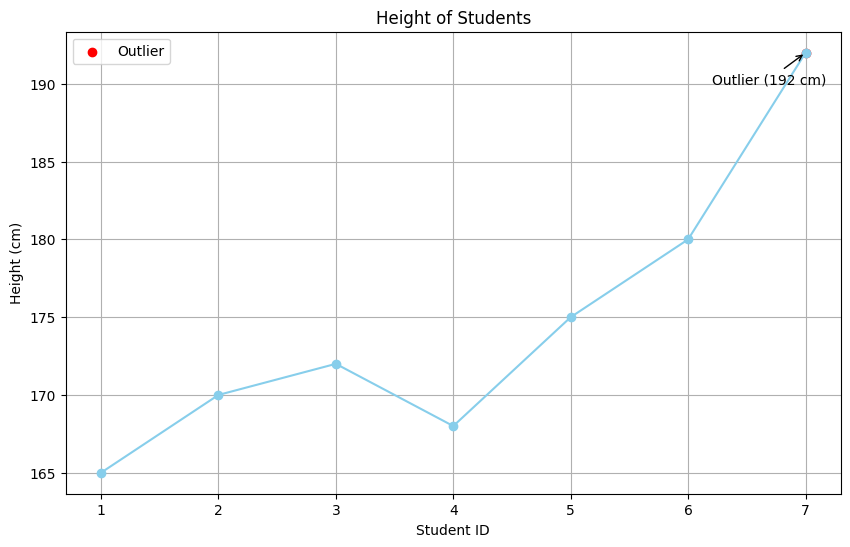

In this dot plot, the heights are represented on the vertical axis, and each dot represents a data point. The outlier (192 cm) is clearly visible as a separate point, significantly higher than the other heights clustered around 165-180 cm.

# How to detect outlier

**1.Nomal disribution**

-  Normal (Gaussian) distribution, outliers are data points that deviate significantly from the majority of the data, which is expected to follow the bell-shaped curve

- Outliers in a normal distribution can occur due to various reasons, such as measurement errors, data entry errors, or genuine extreme values that are part of the underlying distribution but occur with a very low probability.

- The normal distribution is characterized by the following properties:
1. The mean, median, and mode are equal
2. The distribution is defined by two parameters: the mean (μ) and the standard deviation (σ)
3. Approximately 68% of the data falls within 1 standard deviation (μ ± σ) from the mean
4. Approximately 95% of the data falls within 2 standard deviations (μ ± 2σ) from the mean
5. Approximately 99.7% of the data falls within 3 standard deviations (μ ± 3σ) from the mean

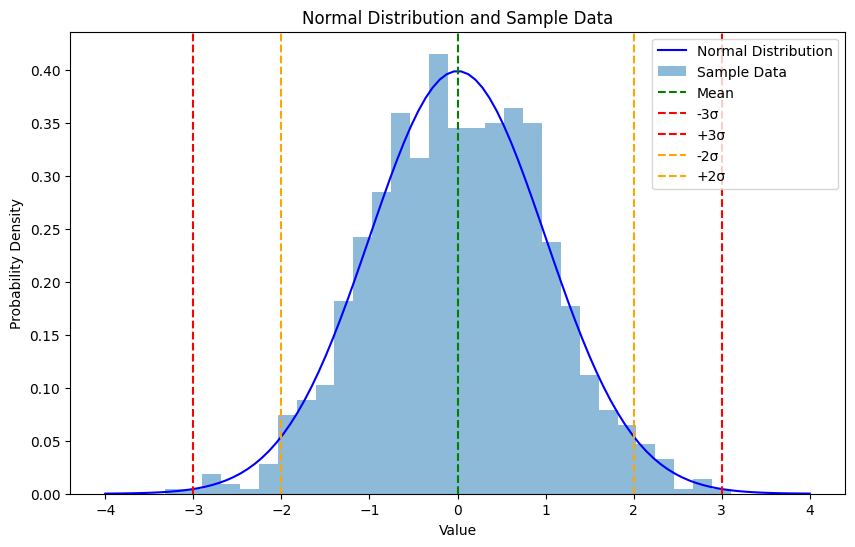

Example:
Suppose we have a dataset of exam scores that follows a normal distribution with a mean of 75 and a standard deviation of 10.

- Data points within μ ± 1σ (65 to 85): Considered normal
- Data points within μ ± 2σ (55 to 95): Still within the expected range, but potentially outliers
- Data points within μ ± 3σ (45 to 105): Likely outliers
- Data points outside μ ± 3σ (< 45 or > 105): Definite outliers

**2. Skewed Distributions**

- In a skewed distribution, outliers can occur on either the positive or negative side of the distribution, depending on the direction of the skew. Skewed distributions are asymmetric, with a longer tail on one side compared to the other, deviating from the symmetric bell-shaped curve of a normal distribution.

- Identifying Outliers in Skewed Distributions:

1. Use robust measures like median and interquartile range (IQR) instead of mean and standard deviation
2. Common method: Outliers beyond Q1 - 1.5 × IQR or Q3 + 1.5 × IQR
3. Adjust thresholds based on the degree of skewness and application

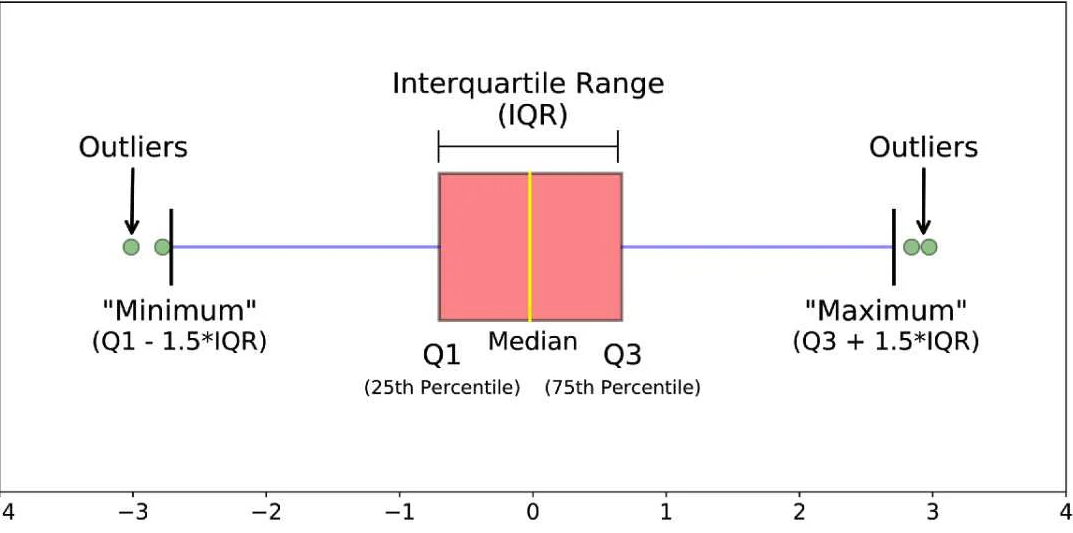

- The IQR is the range between the first quartile (Q1) and the third quartile (Q3), representing the middle 50% of the data.
- The minimum outlier is the smallest value that falls below the lower whisker boundary (Q1 - 1.5 × IQR).
- The maximum outlier is the largest value that falls above the upper whisker boundary (Q3 + 1.5 × IQR).

# Nonparametric distribution

- Non-parametric distributions, also known as distribution-free or assumption-free distributions, are statistical distributions that do not make any assumptions about the underlying probability distribution of the data.

 - Example – distribution of test results in a healthy population with reference limits 2.5th and 97.5th percentiles, respectively

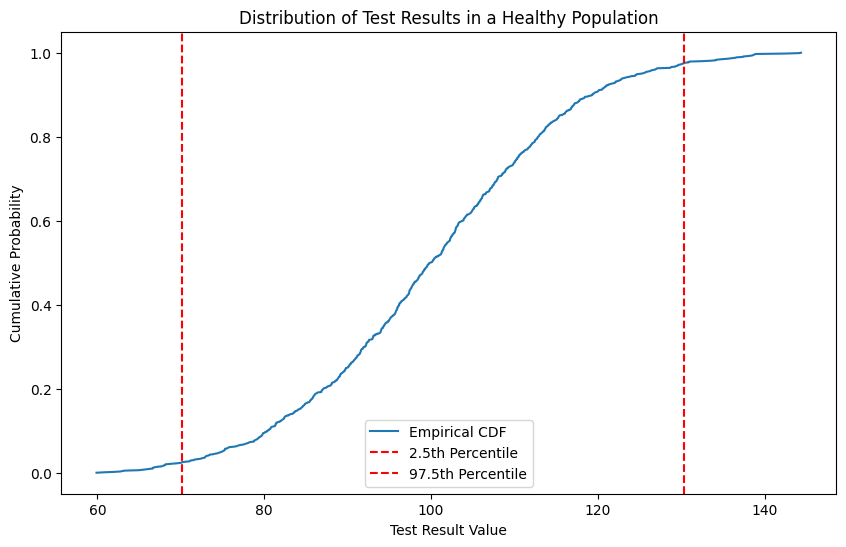

- In the resulting plot, you'll see:

1. The distribution of test results represented by a histogram.
2. Vertical red dashed lines indicating the 2.5th and 97.5th percentiles, which serve as reference limits.
3. Red 'x' markers representing the lower outliers (values below the 2.5th percentile).
4. Red 'x' markers representing the upper outliers (values above the 97.5th percentile).

# Outlier Removal Methods

**1. Outlier Removal using Z-score Method**

- The features are normally or approximately normally
distributed

- Outlier detection and removal are important parts of data preprocessing, particularly when preparing data for statistical analyses, machine learning modeling, and data visualization. One popular method for identifying outliers is the Z-score method, which measures the distance (in standard deviations) a data point is from the mean of the dataset

The Z-score of a data point is a numerical measurement that describes its relationship to the mean of the dataset relative to the standard deviation. It is calculated using the formula:

𝑍
=
(
𝑋
−
𝜇
)
𝜎
Z=
σ
(X−μ)
​


Where:

1. 𝑋
X is the value of the data point.
2. 𝜇
μ is the mean of the dataset.
2.𝜎
σ is the standard deviation of the dataset.

***->Z-score Treatment***

**Step 1: Importing necessary dependencies**


- Import the necessary Python libraries in your script or notebook:

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Step 2: Read and load the dataset**

In [ ]:
df = pd.read_csv("Loan 1.csv")

In [ ]:
df.shape

(20000, 24)

In [ ]:
df.sample(5)

,Customer ID,Name,Gender,Age,Income (USD),Income Stability,Profession,Type of Employment,Location,Loan Amount Request (USD),...,Dependents,Credit Score,No. of Defaults,Has Active Credit Card,Property ID,Property Age,Property Type,Property Location,Co-Applicant,Property Price
1477,C-39683,Karri Payer,F,42,2790.54,Low,Working,NaN,Semi-Urban,120936.89,...,2.0,799.53,0,Unpossessed,728,2790.54,3,Urban,1,197017.82
11559,C-40904,Stefany Rio,M,33,1131.81,Low,Commercial associate,Sales staff,Rural,80855.97,...,1.0,658.64,0,Unpossessed,679,1131.81,3,Urban,1,100028.56
19128,C-5713,Blossom Harlow,M,36,5039.55,Low,Working,Sales staff,Semi-Urban,68592.27,...,2.0,738.67,0,Inactive,119,5039.55,2,Rural,1,90485.47
11433,C-14117,Meghann Jolly,F,42,NaN,Low,Working,Laborers,Semi-Urban,102319.68,...,4.0,706.48,0,NaN,384,NaN,4,Urban,1,138504.12
8908,C-1189,Melonie Goya,M,22,1312.69,Low,Working,Sales staff,Semi-Urban,25699.81,...,NaN,813.32,0,Inactive,12,1312.69,4,Rural,1,28370.74


Step 3: Plot the distribution plots for the features

- Use Matplotlib to create a plot. Here, we’ll plot the original values and highlight potential outliers

<ipython-input-36-af885a539d47>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Income (USD)"])
<ipython-input-36-af885a539d47>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Loan Amount Request (USD)"])


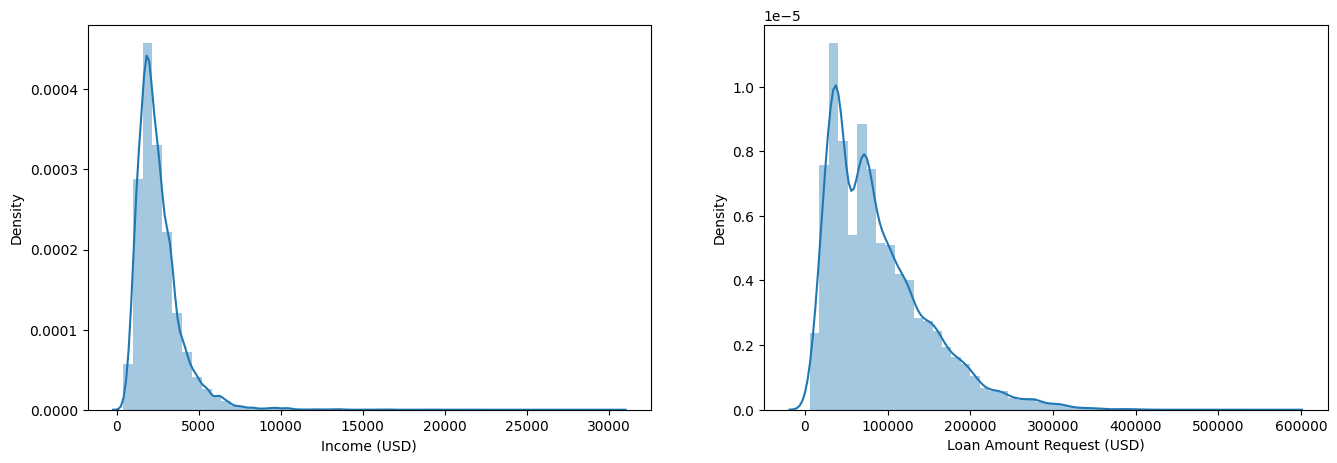

In [ ]:
# Create a figure with a specific size
plt.figure(figsize=(16,5))
# This is the first plot in a 1x2 subplot grid (i.e., 1 row, 2 columns, first plot).
plt.subplot(1,2,1)
# Create the first subplot for the "Income (USD)" column.
sns.distplot(df["Income (USD)"])
plt.subplot(1,2,2)
sns.distplot(df["Loan Amount Request (USD)"])
plt.show()

Step 4: Calculate Mean and Standard Deviation


- Calculate the mean and standard deviation of your dataset. These are needed to compute the Z-scores

In [ ]:
mean_value = df['Income (USD)'].mean()
# print("Mean value of Income (USD):",mean_value)
std_deviation = df['Income (USD)'].std()
# print("std value of Income (USD):",std_deviation)
print("Min value of Income (USD):",df['Income (USD)'].min())
print("Max value of Income (USD):",df['Income (USD)'].max())



Min value of Income (USD): 368.59
Max value of Income (USD): 30427.68


Step 4: Finding the boundary values


In [ ]:
print("Highest allowed",df["Income (USD)"].mean() + 3*df["Income (USD)"].std())
print("Lowest allowed",df["Income (USD)"].mean() - 3*df["Income (USD)"].std())

Highest allowed 6784.721802658088
Lowest allowed -1710.7310140866584


Step 5: Finding the outliers


In [ ]:
df[(df["Income (USD)"] > 6784.72) | (df["Income (USD)"] <-1710.73)]



,Customer ID,Name,Gender,Age,Income (USD),Income Stability,Profession,Type of Employment,Location,Loan Amount Request (USD),...,Dependents,Credit Score,No. of Defaults,Has Active Credit Card,Property ID,Property Age,Property Type,Property Location,Co-Applicant,Property Price
81,C-24776,Herbert Rippel,F,36,8666.14,Low,Working,Core staff,Semi-Urban,128166.89,...,3.0,824.37,0,Active,228,8666.14,2,Semi-Urban,1,164557.78
160,C-3997,Danica Lindsey,F,64,8369.46,Low,Working,Managers,Semi-Urban,232076.65,...,3.0,850.00,0,Inactive,369,8369.46,1,Semi-Urban,1,300990.45
364,C-33801,Sonya Liechty,M,53,10365.44,Low,Commercial associate,High skill tech staff,Urban,200955.65,...,1.0,665.45,0,Inactive,862,10365.44,3,Rural,1,348677.56
369,C-35271,Azzie Rio,M,61,6929.25,Low,Commercial associate,High skill tech staff,Urban,261298.44,...,2.0,656.69,1,Active,435,6929.25,2,Rural,1,487727.94
422,C-7342,Carmina Killingsworth,M,18,10494.65,Low,Working,Core staff,Urban,167607.59,...,4.0,809.55,0,Inactive,90,10494.65,4,Semi-Urban,1,229614.57
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19656,C-7279,Bette Meadow,F,35,8228.49,Low,Working,Managers,Semi-Urban,43169.63,...,2.0,729.10,0,Active,919,8228.49,3,Semi-Urban,1,52208.67
19678,C-8922,Billye Liechty,F,41,7750.53,Low,Commercial associate,Managers,Semi-Urban,74221.89,...,4.0,700.23,0,Unpossessed,437,7750.53,1,Rural,1,93386.22
19786,C-27812,Antonietta Simons,F,39,8270.93,Low,Commercial associate,Managers,Semi-Urban,394555.76,...,2.0,774.05,1,NaN,502,8270.93,3,Rural,1,603517.17
19790,C-11433,America Moats,F,63,8414.09,NaN,Pensioner,NaN,Urban,162203.46,...,2.0,702.07,0,Inactive,481,8414.09,2,Rural,0,296850.48


Step 6: Calculate Z-scores


- Add a new column to your DataFrame for the Z-scores:

Z(Z- score) = ( 𝑋 − 𝜇 ) 𝜎 Z= σ (X−μ)​

Where:

1. 𝑋 X is the value of the data point.
2. 𝜇 μ is the mean of the dataset.
3. 𝜎 σ is the standard deviation of the dataset

In [ ]:
print("Z_score of Income (USD):\n",(df['Income (USD)'] - df['Income (USD)'].mean()) / df['Income (USD)'].std())


Z_score of Income (USD):
 0        0.660844
1       -0.954974
2       -0.897463
3       -0.824400
4       -0.422178
           ...   
19995   -0.838610
19996   -0.365289
19997   -0.201260
19998   -0.488482
19999    1.904194
Name: Income (USD), Length: 20000, dtype: float64


In [ ]:
df.head()

,Customer ID,Name,Gender,Age,Income (USD),Income Stability,Profession,Type of Employment,Location,Loan Amount Request (USD),...,Credit Score,No. of Defaults,Has Active Credit Card,Property ID,Property Age,Property Type,Property Location,Co-Applicant,Property Price,Z_score
0,C-26247,Tandra Olszewski,F,47,3472.69,Low,Commercial associate,Managers,Semi-Urban,137088.98,...,799.14,0,Unpossessed,843,3472.69,2,Urban,1,236644.5,0.660844
1,C-35067,Jeannette Cha,F,57,1184.84,Low,Working,Sales staff,Rural,104771.59,...,833.31,0,Unpossessed,22,1184.84,1,Rural,1,142357.3,-0.954974
2,C-34590,Keva Godfrey,F,52,1266.27,Low,Working,NaN,Semi-Urban,176684.91,...,627.44,0,Unpossessed,1,1266.27,1,Urban,1,300991.24,-0.897463
3,C-16668,Elva Sackett,M,65,1369.72,High,Pensioner,NaN,Rural,97009.18,...,833.20,0,Inactive,730,1369.72,1,Semi-Urban,0,125612.1,-0.824400
4,C-12196,Sade Constable,F,60,1939.23,High,Pensioner,NaN,Urban,109980.00,...,NaN,0,NaN,356,1939.23,4,Semi-Urban,1,180908,-0.422178


Step 7: Showing the Z_score of outliers

In [ ]:
df[(df["Z_score"]>3 ) | (df["Z_score"]<-3 )]

,Customer ID,Name,Gender,Age,Income (USD),Income Stability,Profession,Type of Employment,Location,Loan Amount Request (USD),...,Credit Score,No. of Defaults,Has Active Credit Card,Property ID,Property Age,Property Type,Property Location,Co-Applicant,Property Price,Z_score
81,C-24776,Herbert Rippel,F,36,8666.14,Low,Working,Core staff,Semi-Urban,128166.89,...,824.37,0,Active,228,8666.14,2,Semi-Urban,1,164557.78,4.328771
160,C-3997,Danica Lindsey,F,64,8369.46,Low,Working,Managers,Semi-Urban,232076.65,...,850.00,0,Inactive,369,8369.46,1,Semi-Urban,1,300990.45,4.119237
364,C-33801,Sonya Liechty,M,53,10365.44,Low,Commercial associate,High skill tech staff,Urban,200955.65,...,665.45,0,Inactive,862,10365.44,3,Rural,1,348677.56,5.528919
369,C-35271,Azzie Rio,M,61,6929.25,Low,Commercial associate,High skill tech staff,Urban,261298.44,...,656.69,1,Active,435,6929.25,2,Rural,1,487727.94,3.102075
422,C-7342,Carmina Killingsworth,M,18,10494.65,Low,Working,Core staff,Urban,167607.59,...,809.55,0,Inactive,90,10494.65,4,Semi-Urban,1,229614.57,5.620175
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19656,C-7279,Bette Meadow,F,35,8228.49,Low,Working,Managers,Semi-Urban,43169.63,...,729.10,0,Active,919,8228.49,3,Semi-Urban,1,52208.67,4.019676
19678,C-8922,Billye Liechty,F,41,7750.53,Low,Commercial associate,Managers,Semi-Urban,74221.89,...,700.23,0,Unpossessed,437,7750.53,1,Rural,1,93386.22,3.682112
19786,C-27812,Antonietta Simons,F,39,8270.93,Low,Commercial associate,Managers,Semi-Urban,394555.76,...,774.05,1,NaN,502,8270.93,3,Rural,1,603517.17,4.049650
19790,C-11433,America Moats,F,63,8414.09,NaN,Pensioner,NaN,Urban,162203.46,...,702.07,0,Inactive,481,8414.09,2,Rural,0,296850.48,4.150758


Step 8: Trimming

- Trimming is a method used in statistics to handle outliers in a dataset. It involves removing a certain percentage of the extreme data points from both ends of the data distribution. This is especially useful in reducing the effects of outliers that might skew the results of statistical analysis

In [ ]:
new_df = df[(df['Income (USD)'] < 6784.72) & (df['Income (USD)'] > -1710.73)]


In [ ]:
new_df

,Customer ID,Name,Gender,Age,Income (USD),Income Stability,Profession,Type of Employment,Location,Loan Amount Request (USD),...,Credit Score,No. of Defaults,Has Active Credit Card,Property ID,Property Age,Property Type,Property Location,Co-Applicant,Property Price,Z_score
0,C-26247,Tandra Olszewski,F,47,3472.69,Low,Commercial associate,Managers,Semi-Urban,137088.98,...,799.14,0,Unpossessed,843,3472.69,2,Urban,1,236644.5,0.660844
1,C-35067,Jeannette Cha,F,57,1184.84,Low,Working,Sales staff,Rural,104771.59,...,833.31,0,Unpossessed,22,1184.84,1,Rural,1,142357.3,-0.954974
2,C-34590,Keva Godfrey,F,52,1266.27,Low,Working,NaN,Semi-Urban,176684.91,...,627.44,0,Unpossessed,1,1266.27,1,Urban,1,300991.24,-0.897463
3,C-16668,Elva Sackett,M,65,1369.72,High,Pensioner,NaN,Rural,97009.18,...,833.20,0,Inactive,730,1369.72,1,Semi-Urban,0,125612.1,-0.824400
4,C-12196,Sade Constable,F,60,1939.23,High,Pensioner,NaN,Urban,109980.00,...,NaN,0,NaN,356,1939.23,4,Semi-Urban,1,180908,-0.422178
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,C-9076,Tobias Davilla,F,19,1349.60,Low,Commercial associate,NaN,Semi-Urban,156766.97,...,684.32,0,Inactive,681,1349.60,4,Semi-Urban,1,212778,-0.838610
19996,C-17587,Evelina Hodges,M,22,2019.78,Low,Working,Core staff,Urban,47924.80,...,706.34,0,Inactive,213,2019.78,4,Urban,1,90816.95,-0.365289
19997,C-46479,Karlyn Mckinzie,M,19,2252.03,Low,Working,Core staff,Semi-Urban,18629.88,...,656.46,0,Inactive,270,2252.03,2,Rural,0,21566.27,-0.201260
19998,C-3099,Mariana Pulver,F,21,1845.35,Low,Working,NaN,Semi-Urban,95430.73,...,865.46,0,Unpossessed,489,1845.35,1,Semi-Urban,1,120281.17,-0.488482


In [ ]:
df["Income (USD)"].describe()

count    19250.000000
mean      2536.995394
std       1415.908803
min        368.590000
25%       1659.722500
50%       2224.590000
75%       3082.925000
max      30427.680000
Name: Income (USD), dtype: float64

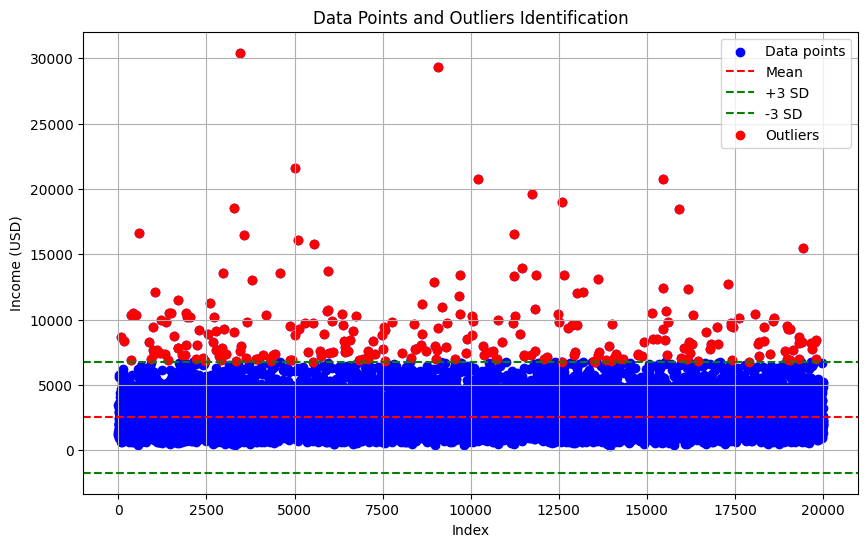

In [ ]:
plt.figure(figsize=(10, 6))  # Set the figure size
plt.scatter(df.index, df["Income (USD)"], color='blue', label='Data points')  # Scatter plot of the original data
plt.axhline(y=mean_value, color='r', linestyle='--', label='Mean')  # Line for the mean
plt.axhline(y=mean_value + 3 * std_deviation, color='g', linestyle='--', label='+3 SD')
plt.axhline(y=mean_value - 3 * std_deviation, color='g', linestyle='--', label='-3 SD')

# Highlight outliers
outliers = df[abs(df['Z_score']) > 3]
plt.scatter(outliers.index, outliers["Income (USD)"], color='red', label='Outliers')

plt.title('Data Points and Outliers Identification')
plt.xlabel('Index')
plt.ylabel("Income (USD)")
plt.legend()
plt.grid(True)
plt.show()


**Explanation of Plot Components:**
1. Scatter Plot: Each data point is plotted as a blue dot based on its position in the dataset and its value.
2. Mean Line: A dashed red line shows the mean of the data.
3. Standard Deviation Lines: Two green dashed lines represent the boundaries of three standard deviations from the mean. Data points outside these lines are potential outliers.
4. Outliers: Outliers, based on the Z-score threshold, are plotted as red dots.

## 2. Outlier Removal using the IQR Method



The Interquartile Range (IQR) method is a popular technique for identifying and removing outliers from a dataset. This method is based on the statistical measure that captures the middle 50% of the data, which is considered to be less sensitive to extreme values than means or standard deviations

**Understand the Quartiles**
1. First Quartile (Q1): This is the median of the lower half of the dataset. It marks the 25th percentile of the data.
3. Third Quartile (Q3): This is the median of the upper half of the dataset. It marks the 75th percentile of the data.
3. Median: This is the middle value of the dataset, which is also known as the second quartile (Q2).

*IQR Based Filtering*

Step-1: Import necessary dependencies

- Import the necessary Python libraries in your script or notebook:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Step-2: Read and load the dataset

In [2]:
df = pd.read_csv('Loan 1.csv')
df.head()

,Customer ID,Name,Gender,Age,Income (USD),Income Stability,Profession,Type of Employment,Location,Loan Amount Request (USD),...,Dependents,Credit Score,No. of Defaults,Has Active Credit Card,Property ID,Property Age,Property Type,Property Location,Co-Applicant,Property Price
0,C-26247,Tandra Olszewski,F,47,3472.69,Low,Commercial associate,Managers,Semi-Urban,137088.98,...,2.0,799.14,0,Unpossessed,843,3472.69,2,Urban,1,236644.5
1,C-35067,Jeannette Cha,F,57,1184.84,Low,Working,Sales staff,Rural,104771.59,...,2.0,833.31,0,Unpossessed,22,1184.84,1,Rural,1,142357.3
2,C-34590,Keva Godfrey,F,52,1266.27,Low,Working,NaN,Semi-Urban,176684.91,...,3.0,627.44,0,Unpossessed,1,1266.27,1,Urban,1,300991.24
3,C-16668,Elva Sackett,M,65,1369.72,High,Pensioner,NaN,Rural,97009.18,...,2.0,833.20,0,Inactive,730,1369.72,1,Semi-Urban,0,125612.1
4,C-12196,Sade Constable,F,60,1939.23,High,Pensioner,NaN,Urban,109980.00,...,NaN,NaN,0,NaN,356,1939.23,4,Semi-Urban,1,180908


Step-3: Plot the distribution plot for the features

<ipython-input-3-11709c1c4d30>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Income (USD)'])
<ipython-input-3-11709c1c4d30>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Current Loan Expenses (USD)'])


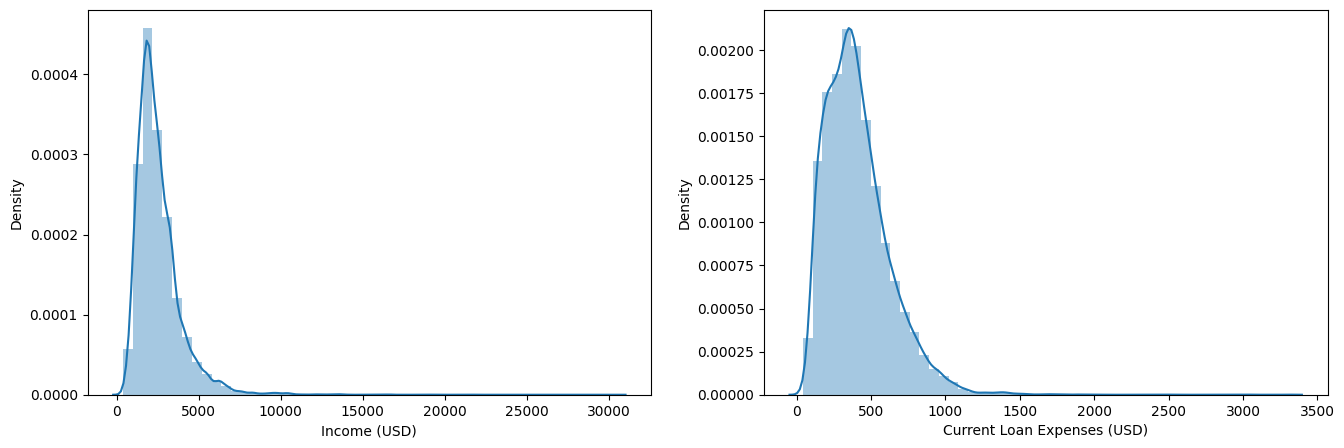

In [3]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df['Income (USD)'])
plt.subplot(1,2,2)
sns.distplot(df['Current Loan Expenses (USD)'])
plt.show()

- The first subplot (1, 2, 1) shows the distribution of the 'Income (USD)' column from the DataFrame. The distplot function creates a histogram and fits a kernel density estimate (KDE) line over the histogram, which provides a smooth representation of the data's distribution.
- The second subplot (1, 2, 2) shows the distribution of the 'Current Loan Expenses (USD)' column from the same DataFrame, also using the distplot function.

Step-4: Form a box-plot for the skewed feature

<Axes: xlabel='Current Loan Expenses (USD)'>

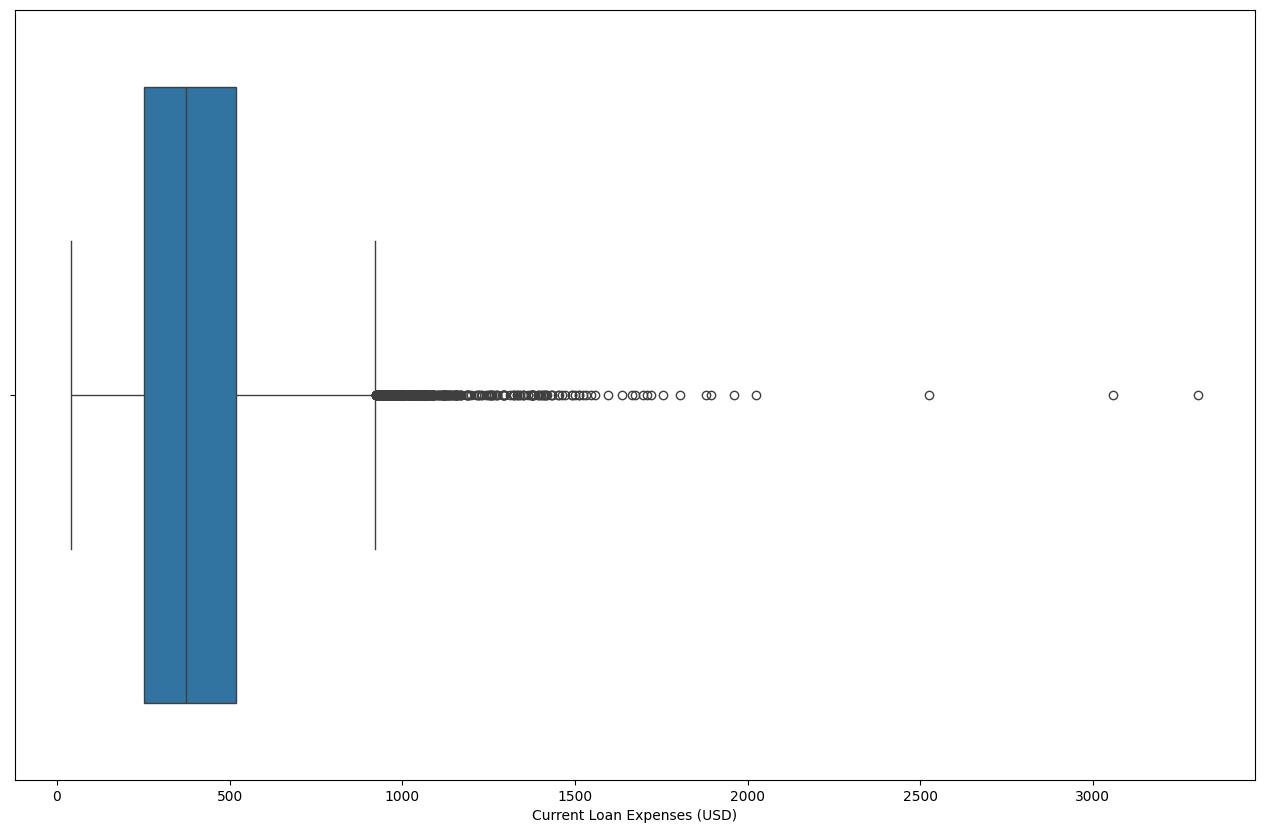

In [4]:
plt.figure(figsize=(16,10))
sns.boxplot(df['Current Loan Expenses (USD)'], orient="h")

- A box plot is a useful visualization tool for understanding the distribution of a numerical feature, particularly when the data is skewed or contains outliers. The box plot displays five key summary statistics:

1. The box itself represents the interquartile range (IQR), which is the range between the 25th and 75th percentiles of the data. This box contains the middle 50% of the data.
2. The horizontal line inside the box represents the median value of the data.

**Step 5: Calculate Q1 and Q3**

In [5]:
Q1 = df['Current Loan Expenses (USD)'].quantile(0.25)
Q3 = df['Current Loan Expenses (USD)'].quantile(0.75)
print("\nQ1 (25th percentile):", Q1)
print("Q3 (75th percentile):", Q3)


Q1 (25th percentile): 250.89
Q3 (75th percentile): 519.57


**Step 6: Calculate the Interquartile Range (IQR)**
- The IQR is calculated by subtracting the First Quartile (Q1) from the Third Quartile (Q3):

       IQR=Q3−Q1

In [6]:
IQR = Q3 - Q1
print("Interquartile Range (IQR)",IQR)

Interquartile Range (IQR) 268.68000000000006


**Step-7: Finding the upper and lower limits**

In [8]:
upper_limit = Q1 + 1.5 * IQR  #Q1 (25th percentile): 250.89
lower_limit = Q3 - 1.5 * IQR  #Q3 (75th percentile): 519.57
print("upper limit",upper_limit)
print("lower limit",lower_limit)

upper limit 653.9100000000001
lower limit 116.54999999999995


**Step-8: Finding outliers**

In [9]:
df[df['Current Loan Expenses (USD)'] > upper_limit]
df[df['Current Loan Expenses (USD)'] < lower_limit]

,Customer ID,Name,Gender,Age,Income (USD),Income Stability,Profession,Type of Employment,Location,Loan Amount Request (USD),...,Dependents,Credit Score,No. of Defaults,Has Active Credit Card,Property ID,Property Age,Property Type,Property Location,Co-Applicant,Property Price
16,C-29433,Noe Gebo,F,37,1370.76,Low,Working,Core staff,Rural,6424.54,...,1.0,733.37,0,Inactive,716,1370.76,3,Semi-Urban,1,9408.78
34,C-39319,Damaris Hammill,F,18,3416.03,Low,Working,Managers,Semi-Urban,12392.77,...,4.0,692.23,0,Inactive,172,3416.03,2,Urban,1,15243.78
94,C-19700,Lorriane Brasfield,F,60,729.10,Low,Working,Laborers,Semi-Urban,13183.91,...,2.0,844.18,0,Unpossessed,116,729.10,3,Semi-Urban,1,22352.37
162,C-33694,Ha Pitcock,M,47,1877.57,Low,Working,Laborers,Semi-Urban,13373.47,...,2.0,801.69,1,Unpossessed,652,1877.57,3,Rural,1,23582.71
213,C-49354,Lucas Wu,M,59,3456.20,Low,Working,NaN,Semi-Urban,7872.48,...,1.0,633.48,0,Active,439,3456.20,1,Urban,1,10593.78
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19875,C-40985,Nena Ficklin,F,56,1613.70,Low,Working,NaN,Rural,24319.50,...,2.0,788.94,0,Unpossessed,644,1613.70,3,Semi-Urban,1,41204.25
19897,C-39119,Eilene Constance,F,60,1716.25,Low,Working,Laborers,Semi-Urban,6647.07,...,2.0,840.68,0,Unpossessed,194,1716.25,2,Semi-Urban,1,10072.67
19918,C-25250,Neville Mckinzie,F,42,1104.88,Low,Commercial associate,NaN,Rural,13904.74,...,2.0,784.46,0,Active,124,1104.88,3,Rural,1,19540.42
19971,C-23406,Deeann Akey,F,33,1515.34,Low,State servant,Accountants,Semi-Urban,11629.89,...,4.0,697.54,1,Inactive,330,1515.34,1,Rural,1,15581.23


**Step-9: Trimming outliers**

- Trimming is a method used in statistics to handle outliers in a dataset. It involves removing a certain percentage of the extreme data points from both ends of the data distribution. This is especially useful in reducing the effects of outliers that might skew the results of statistical analysis

In [11]:
new_df = df[(df['Current Loan Expenses (USD)'] >= lower_limit) & (df['Current Loan Expenses (USD)'] <= upper_limit)]
new_df

,Customer ID,Name,Gender,Age,Income (USD),Income Stability,Profession,Type of Employment,Location,Loan Amount Request (USD),...,Dependents,Credit Score,No. of Defaults,Has Active Credit Card,Property ID,Property Age,Property Type,Property Location,Co-Applicant,Property Price
0,C-26247,Tandra Olszewski,F,47,3472.69,Low,Commercial associate,Managers,Semi-Urban,137088.98,...,2.0,799.14,0,Unpossessed,843,3472.69,2,Urban,1,236644.5
1,C-35067,Jeannette Cha,F,57,1184.84,Low,Working,Sales staff,Rural,104771.59,...,2.0,833.31,0,Unpossessed,22,1184.84,1,Rural,1,142357.3
2,C-34590,Keva Godfrey,F,52,1266.27,Low,Working,NaN,Semi-Urban,176684.91,...,3.0,627.44,0,Unpossessed,1,1266.27,1,Urban,1,300991.24
3,C-16668,Elva Sackett,M,65,1369.72,High,Pensioner,NaN,Rural,97009.18,...,2.0,833.20,0,Inactive,730,1369.72,1,Semi-Urban,0,125612.1
4,C-12196,Sade Constable,F,60,1939.23,High,Pensioner,NaN,Urban,109980.00,...,NaN,NaN,0,NaN,356,1939.23,4,Semi-Urban,1,180908
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19993,C-39756,Alethia Dively,M,25,2061.80,Low,Commercial associate,Cleaning staff,Semi-Urban,27815.85,...,2.0,861.95,0,Active,689,2061.80,3,Rural,1,43343.99
19994,C-32138,Cuc Verrett,M,19,3262.08,Low,Commercial associate,Laborers,Semi-Urban,61534.75,...,3.0,741.39,0,Inactive,893,3262.08,3,Semi-Urban,1,114653.08
19995,C-9076,Tobias Davilla,F,19,1349.60,Low,Commercial associate,NaN,Semi-Urban,156766.97,...,4.0,684.32,0,Inactive,681,1349.60,4,Semi-Urban,1,212778
19996,C-17587,Evelina Hodges,M,22,2019.78,Low,Working,Core staff,Urban,47924.80,...,NaN,706.34,0,Inactive,213,2019.78,4,Urban,1,90816.95


**Step-10: Compare the plots after trimming**


<ipython-input-12-42bdd5b54a69>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Current Loan Expenses (USD)'])
<ipython-input-12-42bdd5b54a69>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df['Current Loan Expenses (USD)'])


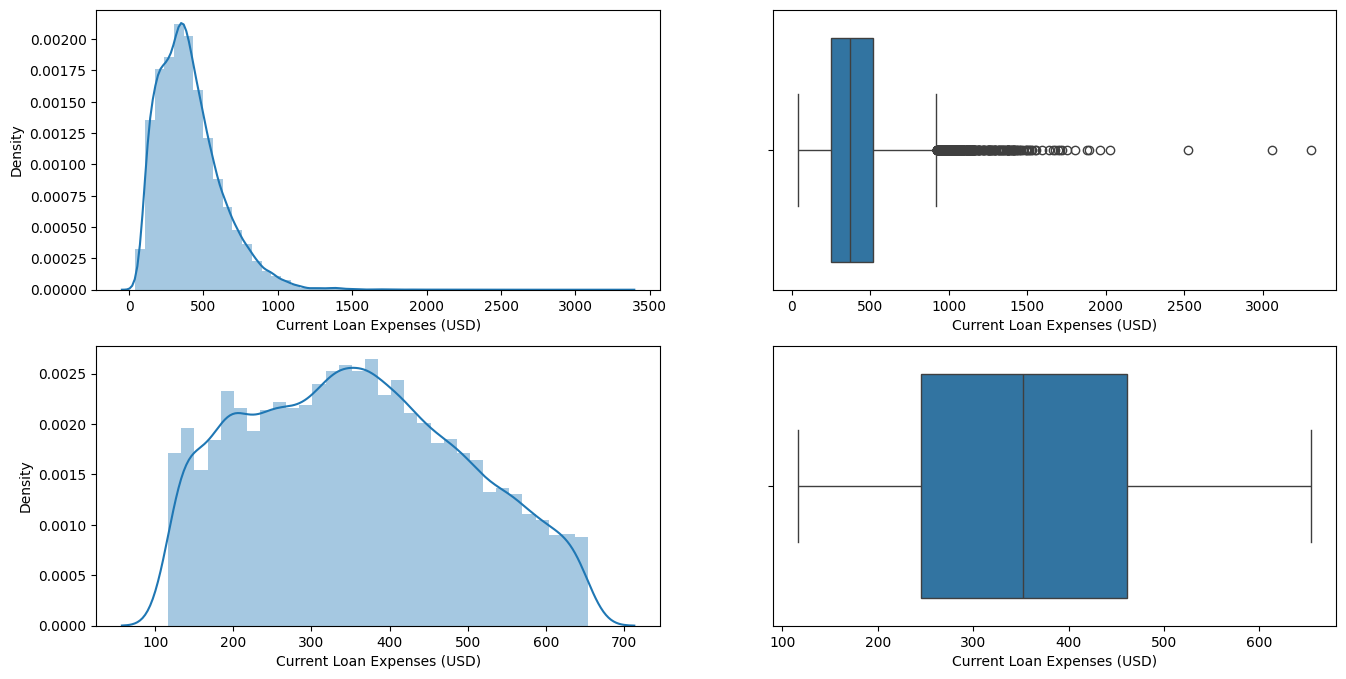

In [12]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df['Current Loan Expenses (USD)'])
plt.subplot(2,2,2)
sns.boxplot(df['Current Loan Expenses (USD)'],orient="h")
plt.subplot(2,2,3)
sns.distplot(new_df['Current Loan Expenses (USD)'])
plt.subplot(2,2,4)
sns.boxplot(new_df['Current Loan Expenses (USD)'],orient="h")
plt.show()

1. Subplot 1 (top left): This subplot displays a distplot (distribution plot) of the "Current Loan Expenses (USD)" column from the df dataframe. A distplot is a combination of a histogram and a kernel density estimate (KDE), which is a smooth curve that represents the estimated probability density function of the data. This plot helps visualize the distribution of the loan expenses in df.
2. Subplot 2 (top right): This subplot displays a horizontal boxplot of the "Current Loan Expenses (USD)" column from the df dataframe. A boxplot is a standardized way of displaying the distribution of data based on five summary statistics: minimum, first quartile (Q1), median, third quartile (Q3), and maximum. It provides a quick overview of the central tendency, spread, and potential outliers in the data.
3. Subplot 3 (bottom left): Similar to the first subplot, this subplot displays a distplot of the "Current Loan Expenses (USD)" column from the new_df dataframe. This allows you to compare the distribution of loan expenses between the two dataframes.
4. Subplot 4 (bottom right): Similar to the second subplot, this subplot displays a horizontal boxplot of the "Current Loan Expenses (USD)" column from the new_df dataframe. This allows you to compare the distribution characteristics (median, quartiles, outliers) of loan expenses between the two dataframes